# Take Home Assignment

###Introduction and Dataset Description

Student performance dataset depicts student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.
Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

Dataset available at: https://doi.org/10.24432/C5TG7T <br>
Domain: Education, student achievement prediction.<br>
Attributes: ~33 including student info (age, sex, family), social (activities, alcohol use), school support, etc.<br>
Target: G3 (final grade out of 20).

##Data Loading

In [1]:
#Import required libraries
import pandas as pd

#Load datasets
mat = pd.read_csv("/content/student-mat.csv", header=None)
por = pd.read_csv("/content/student-por.csv", header=None)

##Math report
#Split the single column into multiple columns
mat = mat[0].str.split(";", expand=True)

#Set the first row as header
mat.columns = mat.iloc[0]
mat_data = mat.drop(index=0).reset_index(drop=True)

##Portugees report
#Split the single column into multiple columns
por = por[0].str.split(";", expand=True)

#Set the first row as header
por.columns = por.iloc[0]
por_data = por.drop(index=0).reset_index(drop=True)

#Show basic info
print("Mathematics dataset shape:", mat_data.shape)
print("Portuguese dataset shape:", por_data.shape)

# Preview first rows
mat_data.head()

Mathematics dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [2]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13


In [3]:
#Columns we expect to be numeric but may have quotes
numeric_cols = ['G1', 'G2']

#Remove quotes and convert to numeric in Maths
for col in numeric_cols:
    mat_data[col] = (
        mat_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    mat_data[col] = pd.to_numeric(mat_data[col], errors='coerce')

#Remove quotes and convert to numeric in Portugees
for col in numeric_cols:
    por_data[col] = (
        por_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    por_data[col] = pd.to_numeric(por_data[col], errors='coerce')

In [4]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
mat_data[numeric_cols] = mat_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
mat_data[categorical_cols] = mat_data[categorical_cols].astype('category')

print(mat_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


In [5]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
por_data[numeric_cols] = por_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
por_data[categorical_cols] = por_data[categorical_cols].astype('category')

print(por_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


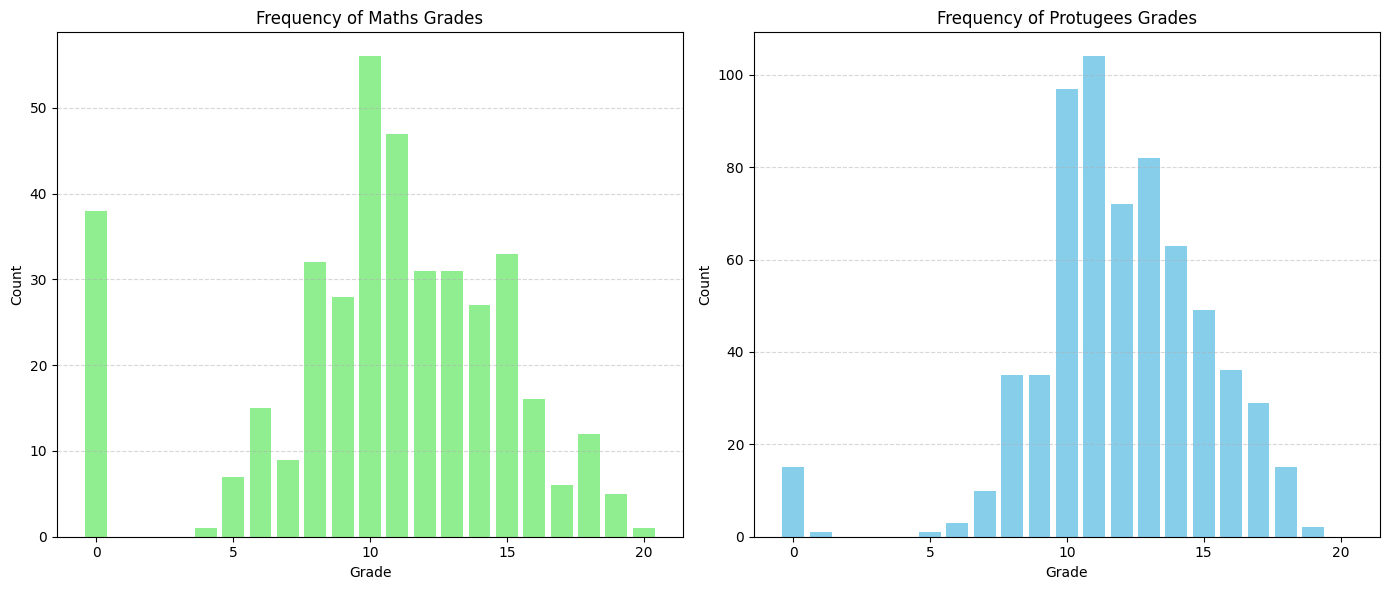

In [6]:
import matplotlib.pyplot as plt

# Count occurrences of each value
math_G3 = mat_data['G3'].value_counts().sort_index()
por_G3 = por_data['G3'].value_counts().sort_index()

# Ensure all values from 0 to 20 are represented
full_range = pd.Series(0, index=range(0, 21))
counts_complete1 = full_range.add(math_G3, fill_value=0).astype(int)
counts_complete2 = full_range.add(por_G3, fill_value=0).astype(int)

# Display the result
# print(counts_complete1)
# print(counts_complete2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Maths frequency
axes[0].bar(counts_complete1.index, counts_complete1.values, color='lightgreen')
axes[0].set_title('Frequency of Maths Grades')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot G3 frequency
axes[1].bar(counts_complete2.index, counts_complete2.values, color='skyblue')
axes[1].set_title('Frequency of Protugees Grades')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

Above true value graphs give clear overview of what the models should predict. It is very much like a Gausian distribution (Bell Shaped curve).

There are queit a lot of zeros. Need to do Feature Engineering.

## Data Preprocessing

First, check whether there are missing values.

In [7]:
#Check for missing values
print("Missing values in math dataset:\n", mat.isnull().sum().sum())
print("Missing values in por dataset:\n", por.isnull().sum().sum())

Missing values in math dataset:
 0
Missing values in por dataset:
 0


There were few issues like,<br> <ul> <li> Inconsistent missing value representations like "?", "N/A", "NA", "" and replaced them with NaN </li>
<li> Unnecessary Spaces and quotes and removed them </li>
<li> Incorrect data types and transform them into correct data type </li> </ul>
 in the data loading step directly.

Then, new combined dataset is created using two seperate Maths and Portuguese. For that Data Integration techniques were used.

In [ ]:
#Load both datasets
d1 = pd.read_csv("/content/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/student-por.csv", sep=";")

#Keys for merging
merge_keys = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#Merge with suffixes
d3 = pd.merge(d1, d2, on=merge_keys, suffixes=("_math", "_por"))

#Take non-grade features from the _math side (to avoid duplicates)
non_grade_features = [
    "guardian_math","traveltime_math","studytime_math","failures_math",
    "schoolsup_math","famsup_math","paid_math","activities_math",
    "higher_math","romantic_math","famrel_math","freetime_math",
    "goout_math","Dalc_math","Walc_math","health_math","absences_math"
]

#Keep merge keys + selected features + grade features
grade_features = ["G1_math", "G2_math", "G3_math",
                  "G1_por", "G2_por", "G3_por"]

final_df = d3[merge_keys + non_grade_features + grade_features]

#Rename the non-grade features back to original names (drop _math suffix)
final_df = final_df.rename(columns=lambda x: x.replace("_math", ""))

print("Number of merged students:", len(final_df))  # should be 382

#Save
final_df.to_csv("student-mat-por-merged.csv", index=False, sep=";")
print("Merged CSV saved as 'student-mat-por-merged.csv'")

This task gives the Integrated Dataset with suitable Feature names.

Preprocessing the Integrated dataset

In [8]:
import pandas as pd
#Load datasets
data = pd.read_csv("/content/student-mat-por-merged.csv", header=None)

#Split the single column into multiple columns
data = data[0].str.split(";", expand=True)

#Set the first row as header
data.columns = data.iloc[0]
data = data.drop(index=0).reset_index(drop=True)

#Show basic info
print("Dataset shape:", data.shape)

#Preview first rows
data.head()

Dataset shape: (382, 36)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_math,G2_math,G3_math,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,11,13,13


In [9]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por', 'G3_por']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
data[categorical_cols] = data[categorical_cols].astype('category')

print(data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
nursery         object
internet        object
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
higher          object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1_math          int64
G2_math          int64
G3_math          int64
G1_por           int64
G2_por           int64
G3_por           int64
dtype: object


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(data.head())

0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

0  reason nursery internet guardian  traveltime  studytime  failures  \
0  course     yes       no   mother           2          2         0   
1  course      no      yes   father           1          2         0   
2   other     yes      yes   mother           1          2         3   
3    home     yes      yes   mother           1          3         0   
4    home     yes       no   father           1          2         0   

0 schoolsup famsup paid activities higher romantic  famrel  freetime  goout  \
0       yes     no   no        

Plot the Distribution of Target Features according to True Values, after merging.

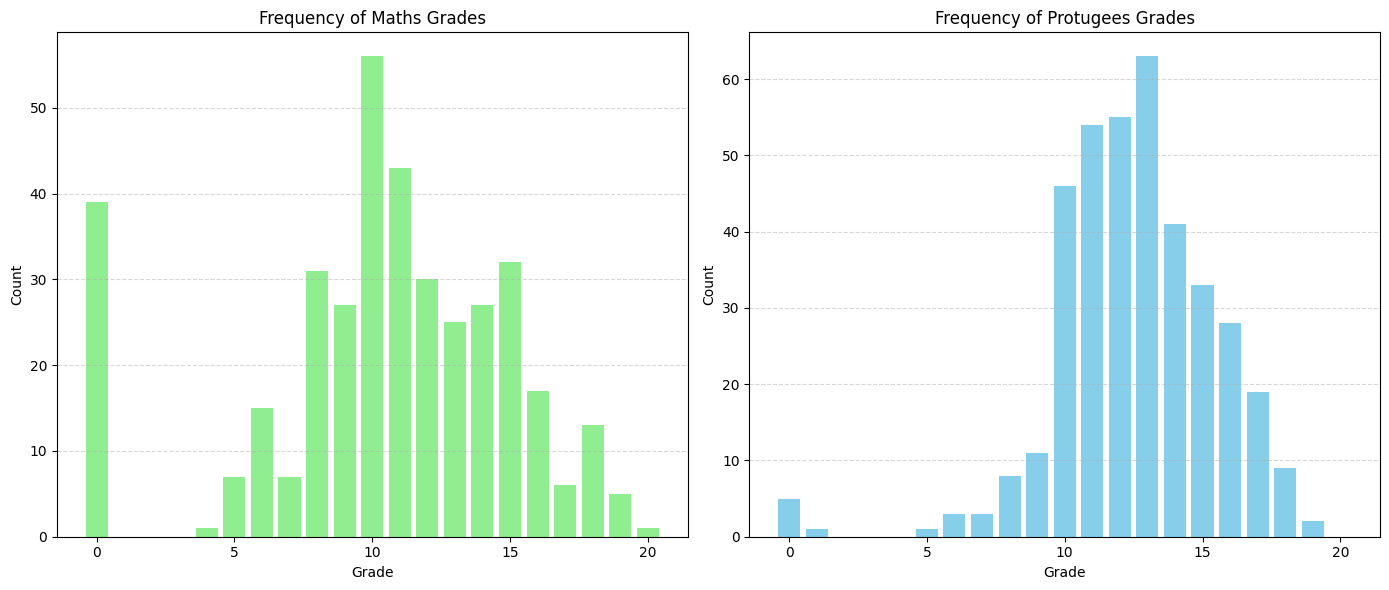

In [11]:
#Count occurrences of each value
math_G3 = data['G3_math'].value_counts().sort_index()
por_G3 = data['G3_por'].value_counts().sort_index()

#Ensure all values from 0 to 20 are represented
full_range = pd.Series(0, index=range(0, 21))
counts_complete1 = full_range.add(math_G3, fill_value=0).astype(int)
counts_complete2 = full_range.add(por_G3, fill_value=0).astype(int)

# Display the result
# print(counts_complete1)
# print(counts_complete2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Maths frequency
axes[0].bar(counts_complete1.index, counts_complete1.values, color='lightgreen')
axes[0].set_title('Frequency of Maths Grades')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot G3 frequency
axes[1].bar(counts_complete2.index, counts_complete2.values, color='skyblue')
axes[1].set_title('Frequency of Protugees Grades')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

Encode the Nominal Categorical features to analyse the data set using One Hot Encoding. <br>
Encode the Ordinal Categorical features using Ordinal Encoder. <br>
Encode the Binary Categorical features (Ex: Sex) using Simple Mapping.

In [12]:
from sklearn.preprocessing import StandardScaler

#Define column groups
nominal_cols = ['school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu']
numeric_cols = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_math', 'G2_math', 'G1_por', 'G2_por']
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
binary_string_cols = ['sex', 'famsize', 'Pstatus']

for col in binary_cols:
    data[col] = (
        data[col]
        .map({'no': 0, 'yes': 1})
        .astype('Int64')
    )
data['sex'] = (
    data['sex']
    .map({'F': 0, 'M': 1})
    .astype('Int64')
)
data['famsize_bin'] = (
    data['famsize']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'LE3': 0, 'GT3': 1})
    .astype('Int64')
)

data['Pstatus_bin'] = (
    data['Pstatus']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'A': 0, 'T': 1})
    .astype('Int64')
)
data['famsize'] = data['famsize'].astype('category')
data['Pstatus'] = data['Pstatus'].astype('category')


#One-Hot Encode nominal categoricals - because categorical feature must be converted to numerical values before appling correlation
data_encoded = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

data_encoded.drop(columns=['famsize', 'Pstatus', 'G3_por'], inplace=True)

#Check result
print(data_encoded.head())
print(data_encoded.dtypes)

   sex  age  Medu  Fedu  nursery  internet  traveltime  studytime  failures  \
0    0   18     4     4        1         0           2          2         0   
1    0   17     1     1        0         1           1          2         0   
2    0   15     1     1        1         1           1          2         3   
3    0   15     4     2        1         1           1          3         0   
4    0   16     3     3        1         0           1          2         0   

   schoolsup  famsup  paid  activities  higher  romantic  famrel  freetime  \
0          1       0     0           0       1         0       4         3   
1          0       1     0           0       1         0       5         3   
2          1       0     1           0       1         0       4         3   
3          0       1     1           1       1         1       3         2   
4          0       1     1           0       1         0       4         3   

   goout  Dalc  Walc  health  absences  G1_math  G2_math

Plot a heatmap of full correlation matrix. And a graph indicating correlation of features to the target feature.

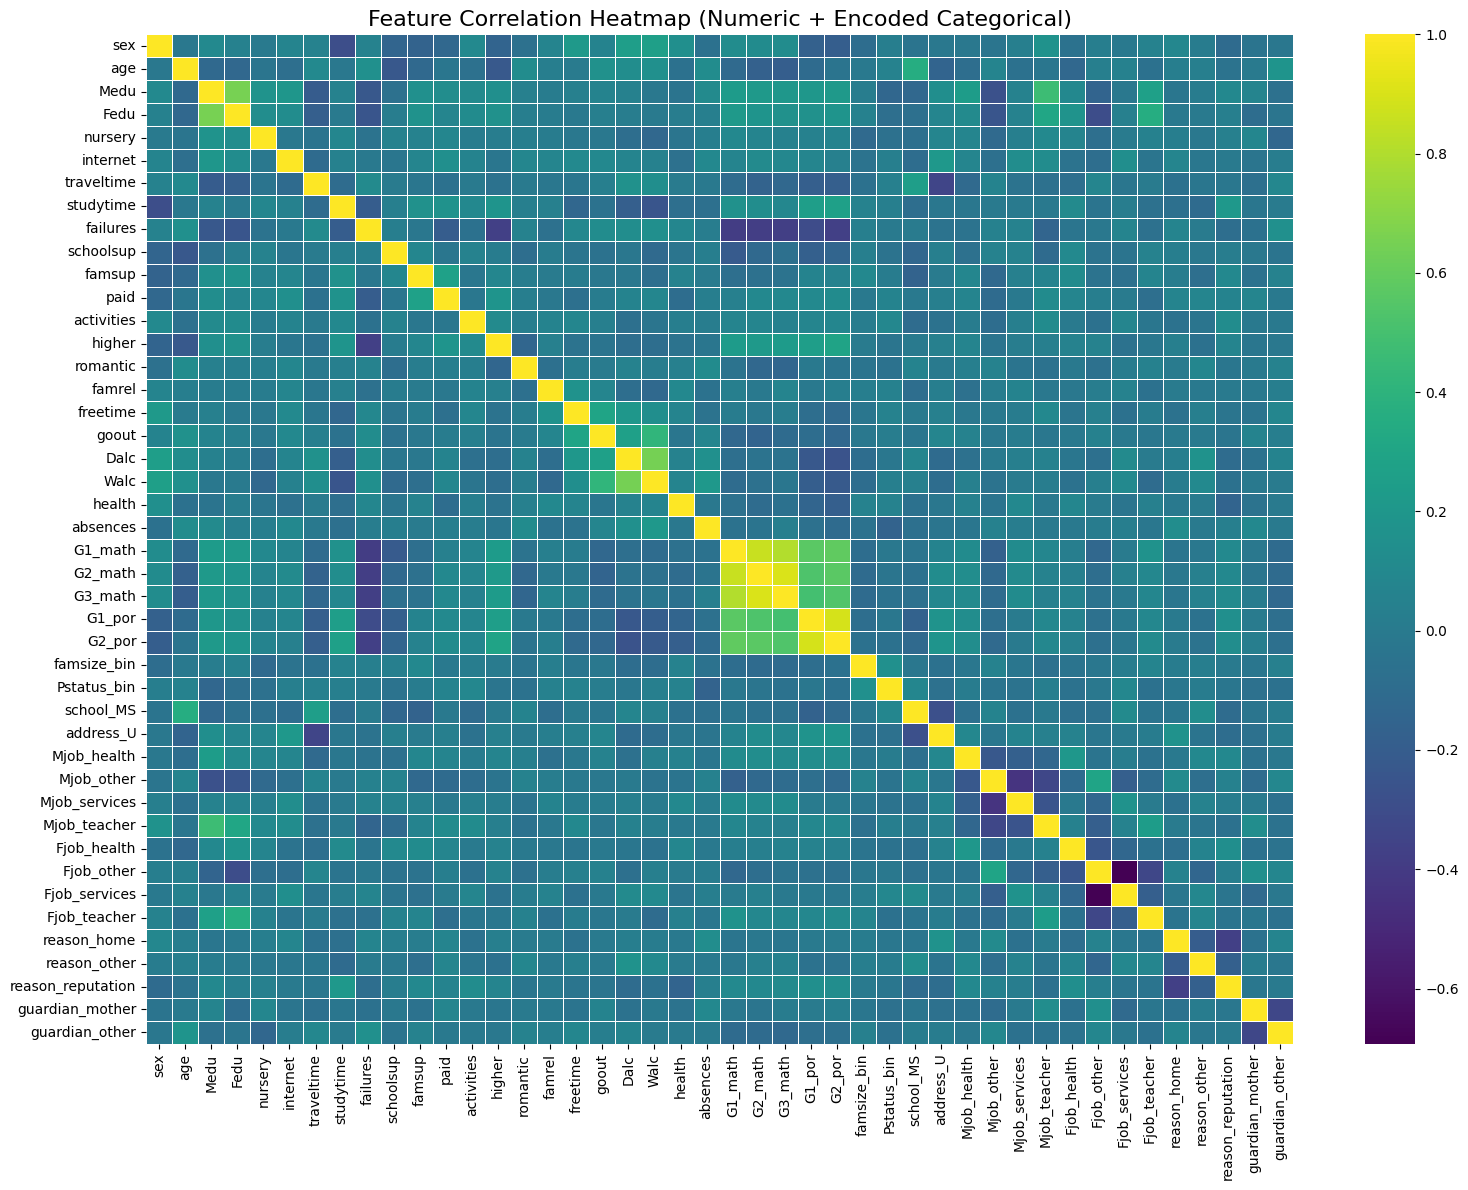

/tmp/ipython-input-1484951264.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")


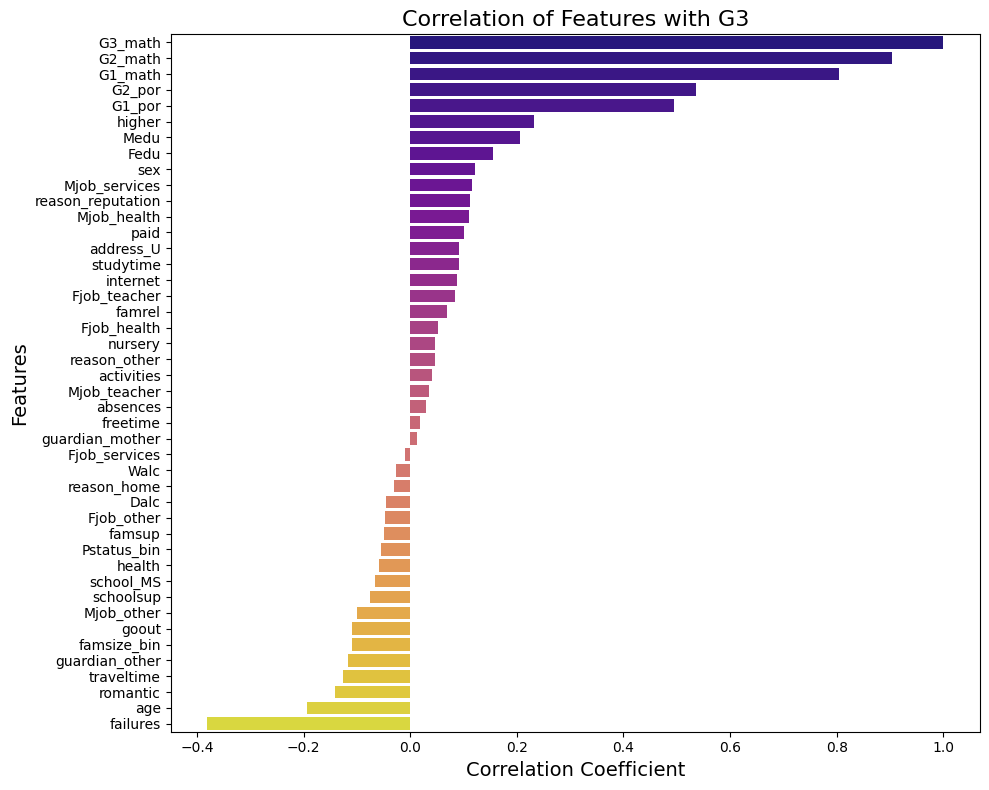

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Compute full correlation matrix
corr_matrix = data_encoded.corr()

#Plot heatmap of full correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="viridis", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric + Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

#Correlation of each feature with G3
g3_corr = corr_matrix['G3_math'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")
plt.title("Correlation of Features with G3", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

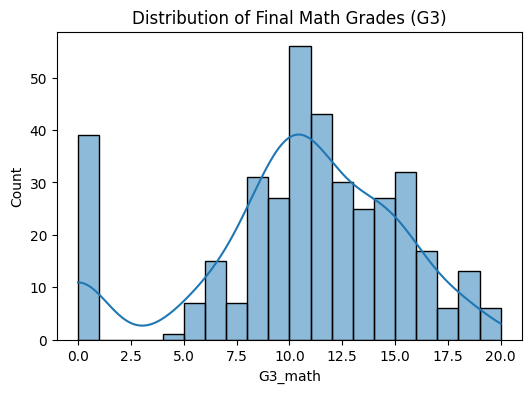

In [14]:
#Distribution of final grade (G3)
plt.figure(figsize=(6,4))
sns.histplot(data_encoded["G3_math"], bins=20, kde=True)
plt.title("Distribution of Final Math Grades (G3)")
plt.show()

### Portuguese Dataset Preprocessing for Ensemble learning

In [ ]:
from sklearn.preprocessing import StandardScaler

#Define column groups
nominal_cols = ['school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu']
numeric_cols = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
binary_string_cols = ['sex', 'famsize', 'Pstatus']

for col in binary_cols:
    por_data[col] = (
        por_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
        .map({'no': 0, 'yes': 1})
        .astype('Int64')
    )

#Encode binary categorical as 0/1 for por_data
# por_data['sex'] = por_data['sex'].map({'F': 0, 'M': 1}).astype('Int64')
# por_data['schoolsup'] = por_data['schoolsup'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['famsup'] = por_data['famsup'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['paid'] = por_data['paid'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['activities'] = por_data['activities'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['nursery'] = por_data['nursery'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['higher'] = por_data['higher'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['internet'] = por_data['internet'].map({'no': 0, 'yes': 1}).astype('Int64')
# por_data['romantic'] = por_data['romantic'].map({'no': 0, 'yes': 1}).astype('Int64')
por_data['sex'] = (
    por_data['sex']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'F': 0, 'M': 1})
    .astype('Int64')
)
por_data['famsize_bin'] = (
    por_data['famsize']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'LE3': 0, 'GT3': 1})
    .astype('Int64')
)

por_data['Pstatus_bin'] = (
    por_data['Pstatus']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'A': 0, 'T': 1})
    .astype('Int64')
)
por_data['famsize'] = por_data['famsize'].astype('category')
por_data['Pstatus'] = por_data['Pstatus'].astype('category')


#One-Hot Encode nominal categoricals - because categorical feature must be converted to numerical values before appling correlation
por_data_encoded = pd.get_dummies(por_data, columns=nominal_cols, drop_first=True)
# por_data_encoded = pd.get_dummies(por_data, columns=nominal_cols, drop_first=True)
#Scale numeric features
# scaler = StandardScaler()
# por_data_encoded[numeric_cols] = scaler.fit_transform(por_data_encoded[numeric_cols])
# por_data[numeric_cols] = scaler.fit_transform(por_data[numeric_cols])

por_data_encoded.drop(columns=['famsize', 'Pstatus'], inplace=True)

#Check result
print(por_data_encoded.head())
print(por_data_encoded.dtypes)

   sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         0          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0     0           0        1       1         0         0       4         3   
1     0           0        0       1         1         0       5         3   
2     0           0        1       1         1         0       4         3   
3     0           1        1       1         1         1       3         2   
4     0           0        1       1         0         0       4         3   

   goout  Dalc  Walc  health  absences  G1  G2  G3  fams

In [ ]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', None)        # don't wrap lines
print(por_data_encoded.head())

   sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         0          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0     0           0        1       1         0         0       4         3   
1     0           0        0       1         1         0       5         3   
2     0           0        1       1         1         0       4         3   
3     0           1        1       1         1         1       3         2   
4     0           0        1       1         0         0       4         3   

   goout  Dalc  Walc  health  absences  G1  G2  G3  fams

Then, We can get into a heatmap of full correlation matrix.

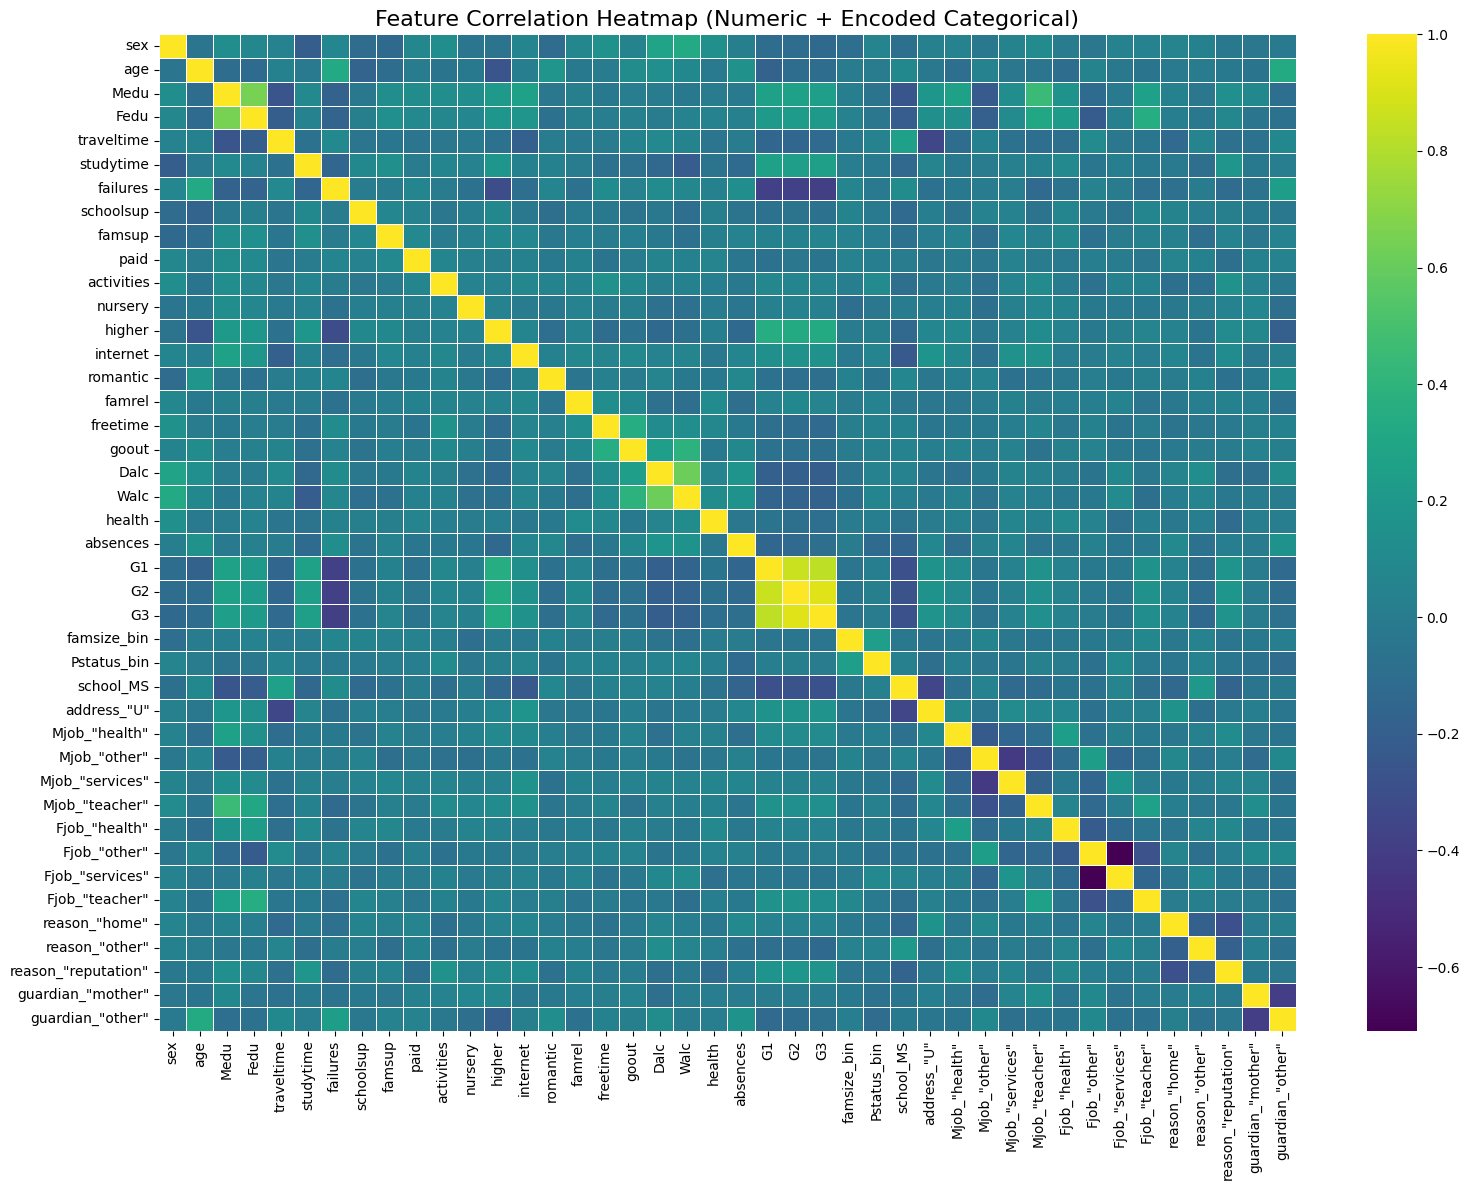

/tmp/ipython-input-3038026083.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")


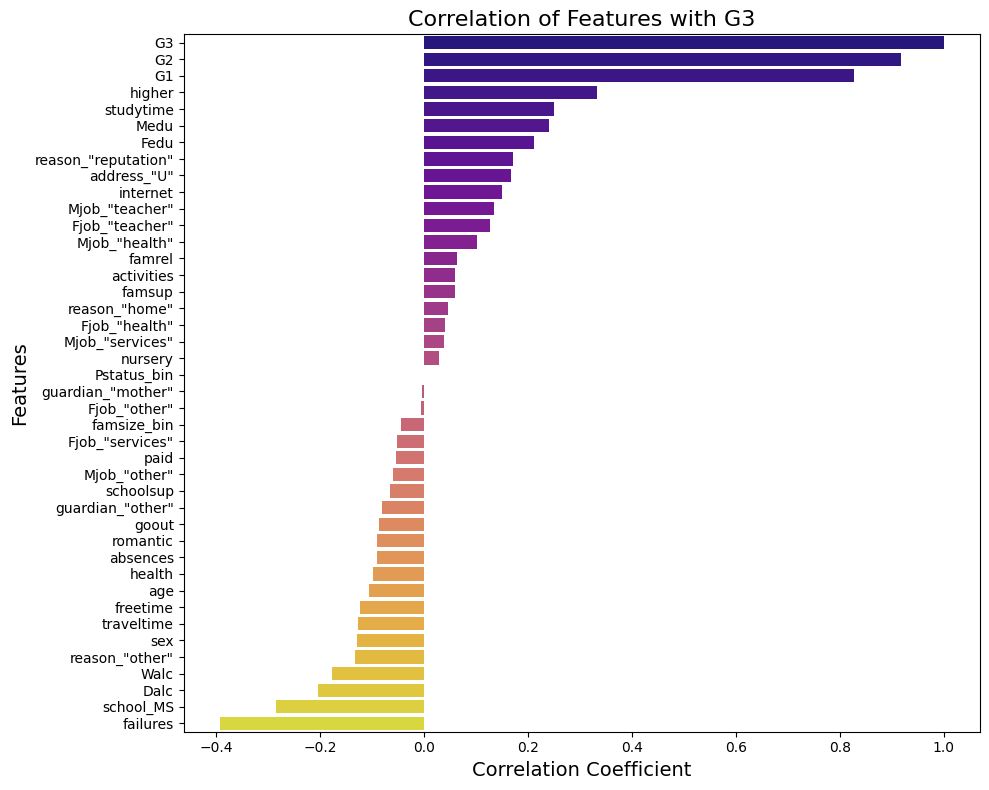

In [ ]:
import seaborn as sns

#Compute full correlation matrix
corr_matrix = por_data_encoded.corr()

#Plot heatmap of full correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="viridis", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric + Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

#Correlation of each feature with G3
g3_corr = corr_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")
plt.title("Correlation of Features with G3", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

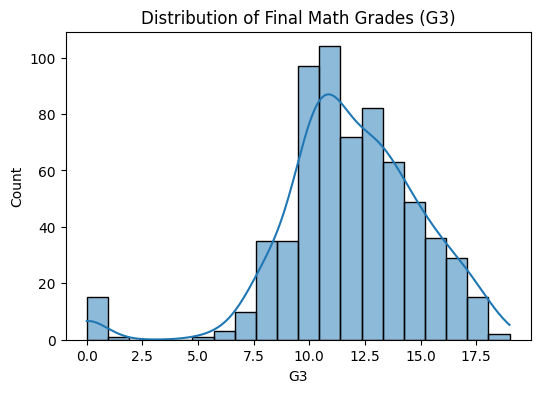

In [ ]:
#Distribution of final grade (G3)
plt.figure(figsize=(6,4))
sns.histplot(por_data_encoded["G3"], bins=20, kde=True)
plt.title("Distribution of Final Portuguese Grades (G3)")
plt.show()

### Feature Selection

Above Heatmap and correlation with G3 are good for intuition (which features are strongly related to the target).


After using One-Hot-Encoder for encoding categorical values, the shape of the dataframe,

In [15]:
print(data_encoded.shape)

(382, 44)


Here, I am using Open loop method (Fileter method) called SelectKBest scores with f_regression whhich is used statistical ranking of features.

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

#X = all features except target
X = data_encoded.drop('G3_math', axis=1)
y = data_encoded['G3_math']

#Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

#Create DataFrame of features and scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores.head(20))  # sanity check

              Feature        Score
23            G2_math  1679.143383
22            G1_math   700.258152
25             G2_por   152.821401
24             G1_por   123.529199
8            failures    64.425770
13             higher    21.651401
2                Medu    16.753257
1                 age    14.954846
3                Fedu     9.409238
14           romantic     7.786598
6          traveltime     6.130630
0                 sex     5.710010
42     guardian_other     5.347596
32      Mjob_services     5.163269
40  reason_reputation     4.778840
26        famsize_bin     4.670692
30        Mjob_health     4.646597
17              goout     4.624759
31         Mjob_other     3.889841
11               paid     3.860638


To find the optimal number of features (k), I need to combine feature ranking with model performance testing.

Plot the scores from  in descending order — look for the point where the curve flattens (elbow). That's often a good k.

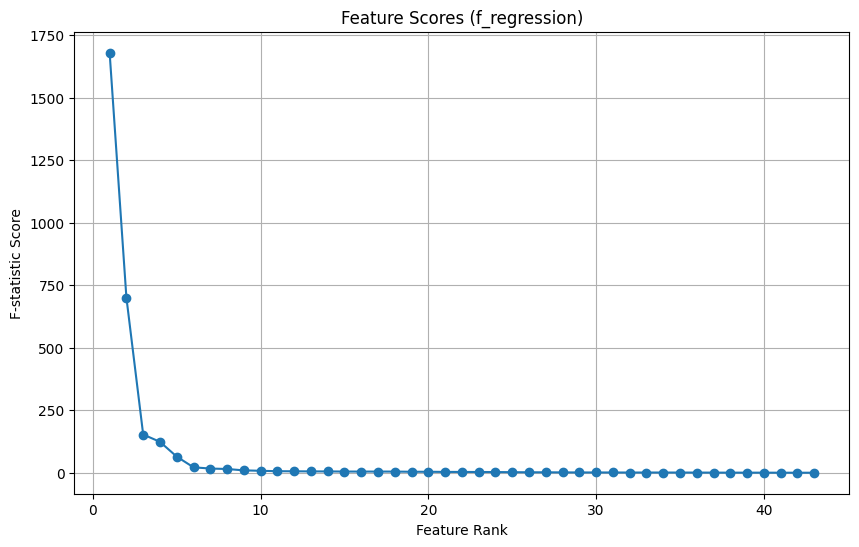

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(feature_scores)+1), feature_scores['Score'].values, marker='o')
plt.title('Feature Scores (f_regression)')
plt.xlabel('Feature Rank')
plt.ylabel('F-statistic Score')
plt.grid(True)
plt.show()

Then, I am using a Close loop method (Wrapper method) called Cross Validation which is testing different k values with Cross validation.

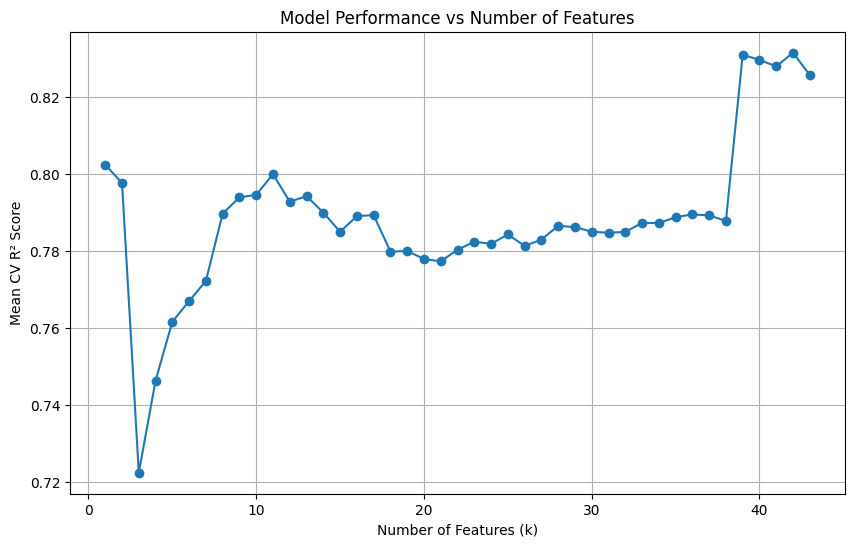

Optimal number of features: 42


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

scores_per_k = []
k_values = range(1, len(feature_scores)+1)

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    model = RandomForestRegressor(random_state=42)
    cv_scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    scores_per_k.append(np.mean(cv_scores))

# Plot CV scores vs k
plt.figure(figsize=(10,6))
plt.plot(k_values, scores_per_k, marker='o')
plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(scores_per_k)]
print(f"Optimal number of features: {best_k}")

When analysing both Open Loop method and Closed loop method outputs it gives around (7-11) features which have highest feature score is enough. <br> For a better model I decide to apply Feature Extraction also. So, I select (12-14) features out of 44 (after encoding) features.

### Portuguese Dataset Feature Selection for Ensemble learning

In [ ]:
print(por_data_encoded.shape)

(649, 42)


Here, I am using Open loop method (Fileter method) called SelectKBest scores with f_regression whhich is used statistical ranking of features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

#X = all features except target
X = por_data_encoded.drop('G3', axis=1)
y = por_data['G3']

#Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

#Create DataFrame of features and scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores.head(20))

                Feature        Score
23                   G2  3493.281566
22                   G1  1393.466713
6              failures   118.406123
12               higher    80.242453
26            school_MS    56.890677
5             studytime    43.055598
2                  Medu    39.597729
3                  Fedu    30.386973
18                 Dalc    28.301925
19                 Walc    20.832519
38  reason_"reputation"    19.475642
27          address_"U"    18.707911
13             internet    14.897632
31       Mjob_"teacher"    11.994103
37       reason_"other"    11.575608
0                   sex    10.962308
4            traveltime    10.635922
35       Fjob_"teacher"    10.423399
16             freetime     9.890471
1                   age     7.423385


To find the optimal number of features (k), I need to combine feature ranking with model performance testing.

Plot the scores from  in descending order — look for the point where the curve flattens (elbow). That's often a good k.

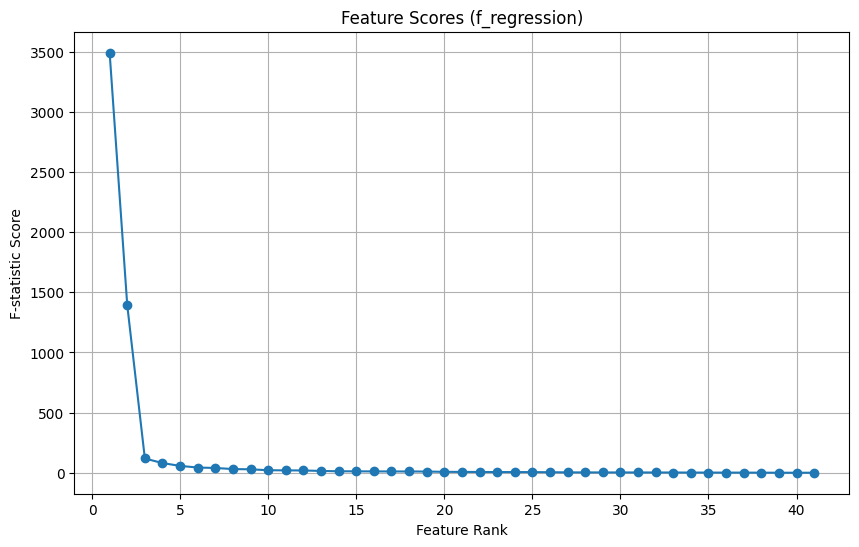

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(feature_scores)+1), feature_scores['Score'].values, marker='o')
plt.title('Feature Scores (f_regression)')
plt.xlabel('Feature Rank')
plt.ylabel('F-statistic Score')
plt.grid(True)
plt.show()

Then, I am using a Close loop method (Wrapper method) called Cross Validation which is testing different k values with Cross validation.

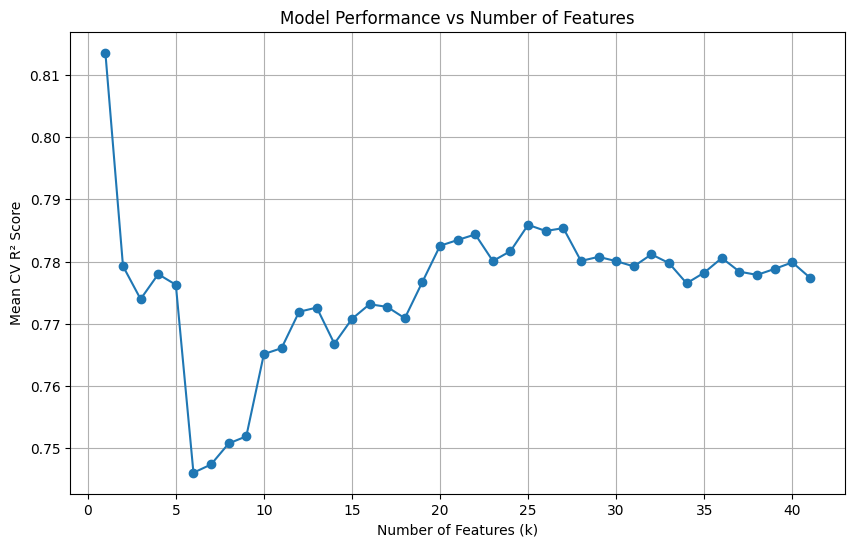

Optimal number of features: 1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

scores_per_k = []
k_values = range(1, len(feature_scores)+1)

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    model = RandomForestRegressor(random_state=42)
    cv_scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    scores_per_k.append(np.mean(cv_scores))

# Plot CV scores vs k
plt.figure(figsize=(10,6))
plt.plot(k_values, scores_per_k, marker='o')
plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(scores_per_k)]
print(f"Optimal number of features: {best_k}")

When analysing both Open Loop method and Closed loop method outputs it gives around (4-7) features which have highest feature score is enough. <br> For a better model I decide to apply Feature Extraction also. So, I select (7-10) features out of 42 (after encoding) features.

### Feature Extraction

In [19]:
#Top 14 features from feature selection
selected_features = [
    'G2_math', 'G1_math', 'G2_por', 'G1_por', 'failures', 'higher', 'Medu', 'age', 'Fedu', 'romantic', 'traveltime', 'sex', 'guardian_other', 'Mjob_services'
]

#Keep only these features + target
data_selected = data_encoded[selected_features]
y = data_encoded['G3_math']

PCA transforms your selected features into a smaller set of uncorrelated components that capture most of the variance in the data.


Explained variance ratio per component:
[0.26950422 0.11097533 0.09399233 0.08987647 0.07595592 0.06986473
 0.06343515 0.0568939  0.05310392 0.04051705 0.03480388 0.02447967
 0.0095777  0.00701975]


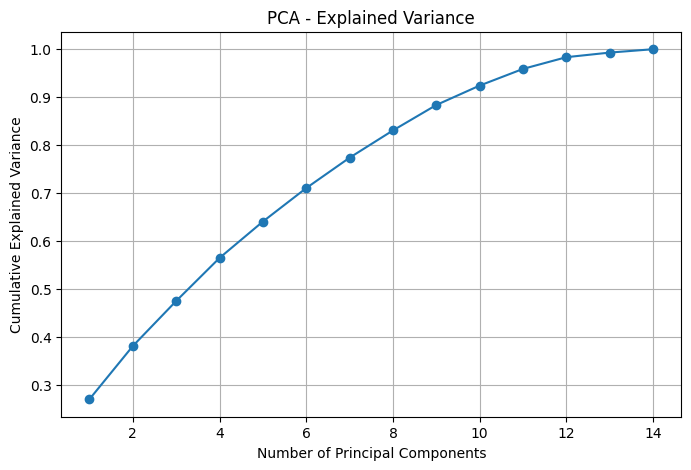

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

#Standardize features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

#Apply PCA
pca = PCA(n_components=None)  # keep all components initially
X_pca = pca.fit_transform(data_scaled)

#Explained variance ratio
explained_variance = pca.explained_variance_ratio_

#Create a DataFrame for PCA components
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

print("Explained variance ratio per component:")
print(explained_variance)

#Plot cumulative explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance.cumsum(),
         marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

According to cumulative explained variance plot I can pick the smallest number of components that explain ~90-95% of the variance.<br> So, I can choose 10 components out of 14.



In [21]:
#Keep exactly 10 components
pca = PCA(n_components=10)
pca_out = pca.fit_transform(data_scaled)

# Explained variance ratio for each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.26950422 0.11097533 0.09399233 0.08987647 0.07595592 0.06986473
 0.06343515 0.0568939  0.05310392 0.04051705]
Cumulative explained variance: [0.26950422 0.38047954 0.47447187 0.56434835 0.64030427 0.71016899
 0.77360414 0.83049804 0.88360195 0.924119  ]


Put PCA output into a DataFrame.

In [22]:
ready_data = pd.DataFrame(
    pca_out,
    columns=[f'PC{i+1}' for i in range(10)]
)
print(ready_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.872210  2.426529 -0.960631  1.243809  1.494939  0.157430  0.316902   
1 -2.492508 -1.154563 -0.359711  1.971764 -0.312705 -0.314198 -0.801135   
2 -2.135844 -1.671370  0.258633  1.364207 -1.656168  0.420317 -1.550509   
3  2.014605 -0.220542 -0.852271  0.167069 -0.674914 -0.894380  0.639291   
4 -0.201328  0.425013 -0.821094  1.577866 -0.114863 -0.128114 -0.799332   

        PC8       PC9      PC10  
0  1.958243 -1.198778 -1.049339  
1  0.252489 -1.209471 -0.113694  
2 -1.050491  2.222317  1.391131  
3 -1.434084  0.460934 -0.370103  
4  0.305144  0.075234 -0.396945  


### Portuguese Dataset Feature Extraction for Ensemble learning

In [ ]:
#Top 14 features from feature selection
por_selected_features = [
    'G2', 'G1', 'failures', 'higher', 'school_MS', 'studytime', 'Medu', 'Fedu', 'Dalc', 'Walc'
]

#Keep only these features + target
por_data_selected = por_data_encoded[por_selected_features]
y = por_data_encoded['G3']

Explained variance ratio per component:
[0.30772373 0.16878762 0.11880944 0.0921052  0.0859863  0.07392064
 0.06712885 0.03879837 0.03334876 0.0133911 ]


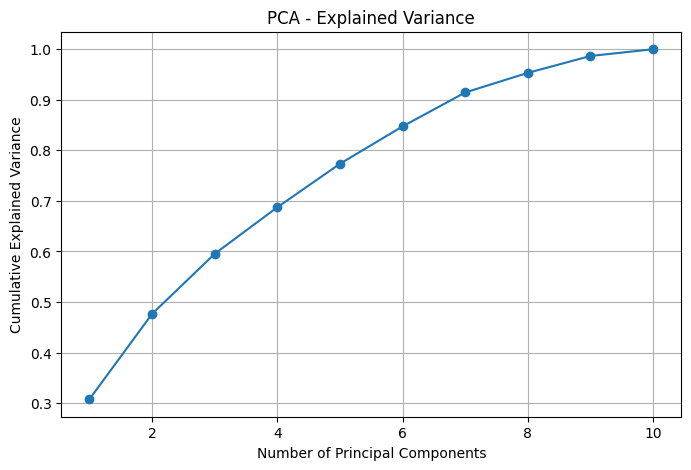

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

#Standardize features before PCA
scaler = StandardScaler()
por_data_scaled = scaler.fit_transform(por_data_selected)

#Apply PCA
pca_por = PCA(n_components=None)  # keep all components initially
X_pca_por = pca_por.fit_transform(por_data_scaled)

#Explained variance ratio
explained_variance_por = pca_por.explained_variance_ratio_

#Create a DataFrame for PCA components
pca_df_por = pd.DataFrame(
    X_pca_por,
    columns=[f'PC{i+1}' for i in range(X_pca_por.shape[1])]
)

print("Explained variance ratio per component:")
print(explained_variance_por)

#Plot cumulative explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_por)+1),
         explained_variance_por.cumsum(),
         marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
#Keep exactly 7 components
pca_por = PCA(n_components=7)
pca_out_por = pca_por.fit_transform(por_data_scaled)

# Explained variance ratio for each component
print("Explained variance ratio:", pca_por.explained_variance_ratio_)
print("Cumulative explained variance:", pca_por.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.30772373 0.16878762 0.11880944 0.0921052  0.0859863  0.07392064
 0.06712885]
Cumulative explained variance: [0.30772373 0.47651135 0.59532079 0.68742599 0.77341228 0.84733292
 0.91446177]


In [ ]:
ready_data_por = pd.DataFrame(
    pca_out_por,
    columns=[f'PC{i+1}' for i in range(7)]
)
print(ready_data_por.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.496029  0.542897  3.140512  0.521413  1.161612 -1.449227 -1.144217
1 -0.525672 -1.725999 -0.388407 -0.344424  0.096144 -1.367589 -0.494422
2 -0.186607 -0.315497 -1.918475 -0.616044 -0.109041 -0.772998 -0.093084
3  2.161339 -0.637165  0.327666 -0.735923  0.491314  0.224202 -0.120761
4  1.045737  0.110733  0.560205 -0.091187 -0.096202 -0.476456 -0.223656


## Modeling

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Prepare data - Features and target
X = ready_data
y = y

In [24]:
#Train/test split for a final hold‑out evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 305
Testing set size: 77


In [25]:
#Initialize regression models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

In [26]:
#Cross‑validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # R² scores
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    # Negative MSE scores (need to negate back to positive)
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    results.append({
        'Model': name,
        'Mean R²': np.mean(r2_scores),
        'Std R²': np.std(r2_scores),
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores)
    })

In [28]:
#Display CV results
results_df = pd.DataFrame(results)
print("\nCross‑Validation Results (5‑fold):")
print(results_df)

#Final training on full train set and evaluation on hold‑out test set
final_results = []

#Store predictions for later plotting
y_pred_rf = None
y_pred_svr = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    final_results.append({
        'Model': name,
        'Test R²': r2,
        'Test RMSE': rmse
    })

    #Save predictions for plotting
    if name.lower() == "randomforest":
        y_pred_rf = y_pred
    elif name.lower() == "svr":
        y_pred_svr = y_pred

final_results_df = pd.DataFrame(final_results)
print("\nFinal Hold‑out Test Results:")
print(final_results_df)


Cross‑Validation Results (5‑fold):
          Model   Mean R²    Std R²  Mean RMSE  Std RMSE
0  RandomForest  0.685681  0.064864   2.597135  0.252751
1           SVR  0.622330  0.026745   2.865933  0.096460

Final Hold‑out Test Results:
          Model   Test R²  Test RMSE
0  RandomForest  0.684349   2.654212
1           SVR  0.592462   3.015892


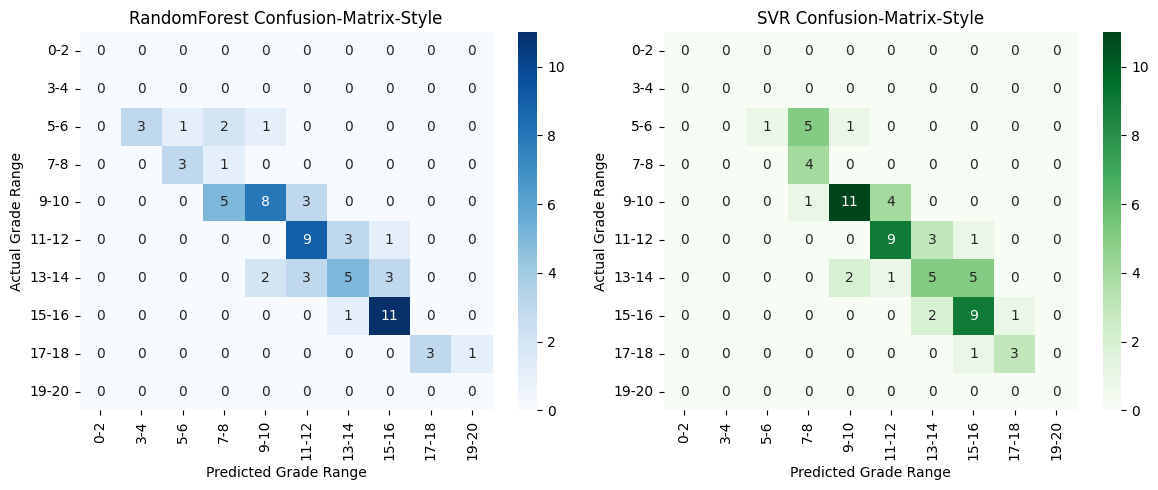

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#y_true is the same for both models
y_true = y_test

#y_pred_rf and y_pred_svr get from above
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ['0-2', '3-4', '5-6', '7-8', '9-10','11-12', '13-14', '15-16', '17-18', '19-20']

def get_confusion_matrix(y_true, y_pred, bins, labels):
    y_true_binned = pd.cut(y_true, bins=bins, labels=labels, right=True)
    y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels, right=True)
    valid_idx = y_true_binned.notna() & y_pred_binned.notna()
    return confusion_matrix(y_true_binned[valid_idx], y_pred_binned[valid_idx], labels=labels)

cm_rf = get_confusion_matrix(y_true, y_pred_rf, bins, labels)
cm_svr = get_confusion_matrix(y_true, y_pred_svr, bins, labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('RandomForest Confusion-Matrix-Style')
axes[0].set_xlabel('Predicted Grade Range')
axes[0].set_ylabel('Actual Grade Range')

sns.heatmap(cm_svr, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('SVR Confusion-Matrix-Style')
axes[1].set_xlabel('Predicted Grade Range')
axes[1].set_ylabel('Actual Grade Range')

plt.tight_layout()
plt.show()

## Model Improvements

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

#Prepare data
X = ready_data
y = y
# Hold-out split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
#Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
#Tune RandomForest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV R²:", rf_grid.best_score_)

Best RF Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RF CV R²: 0.6860899745044825


In [34]:
#Tune SVR
#SVR is sensitive to scaling — scale features if not already scaled
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

svr_params = {
    'svr__kernel': ['rbf', 'linear', 'poly'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__degree': [2, 3, 4]  # only used for poly kernel
}

svr_grid = GridSearchCV(
    svr_pipeline,
    svr_params,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)
svr_grid.fit(X_train, y_train)

print("Best SVR Params:", svr_grid.best_params_)
print("Best SVR CV R²:", svr_grid.best_score_)

Best SVR Params: {'svr__C': 100, 'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best SVR CV R²: 0.7204455852807428


In [35]:
#Evaluate best models on hold-out test set
best_rf = rf_grid.best_estimator_
best_svr = svr_grid.best_estimator_

models = {
    "RandomForest": best_rf,
    "SVR": best_svr
}

#Store predictions for later plotting
y_pred_rf = None
y_pred_svr = None

final_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    final_results.append({
        'Model': name,
        'Test R²': r2,
        'Test RMSE': rmse
    })

    #Save predictions for plotting
    if name.lower() == "randomforest":
        y_pred_rf_best = y_pred
    elif name.lower() == "svr":
        y_pred_svr_best = y_pred

final_results_df = pd.DataFrame(final_results)
print("\nFinal Hold-out Test Results:")
print(final_results_df)


Final Hold-out Test Results:
          Model   Test R²  Test RMSE
0  RandomForest  0.682312   2.662763
1           SVR  0.669241   2.716987


In [36]:
#Showcase the best model
best_model_row = final_results_df.sort_values(by='Test R²', ascending=False).iloc[0]
print(f"\n🏆 Best Model: {best_model_row['Model']}")
print(f"Test R²: {best_model_row['Test R²']:.4f}")
print(f"Test RMSE: {best_model_row['Test RMSE']:.4f}")


🏆 Best Model: RandomForest
Test R²: 0.6823
Test RMSE: 2.6628


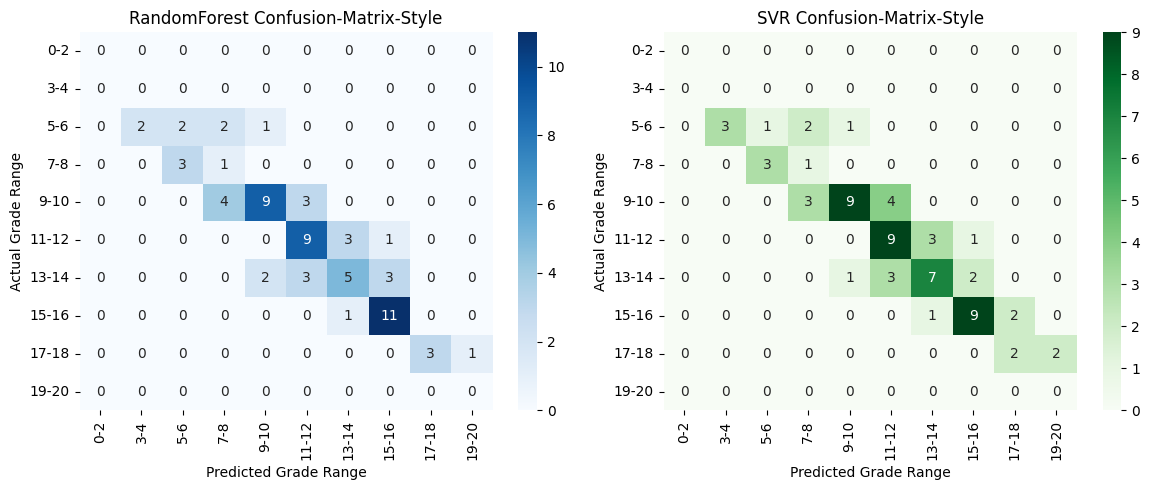

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#y_true is the same for both models
y_true = y_test

#y_pred_rf and y_pred_svr get from above
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ['0-2', '3-4', '5-6', '7-8', '9-10','11-12', '13-14', '15-16', '17-18', '19-20']

def get_confusion_matrix(y_true, y_pred, bins, labels):
    y_true_binned = pd.cut(y_true, bins=bins, labels=labels, right=True)
    y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels, right=True)
    valid_idx = y_true_binned.notna() & y_pred_binned.notna()
    return confusion_matrix(y_true_binned[valid_idx], y_pred_binned[valid_idx], labels=labels)

cm_rf = get_confusion_matrix(y_true, y_pred_rf_best, bins, labels)
cm_svr = get_confusion_matrix(y_true, y_pred_svr_best, bins, labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('RandomForest Confusion-Matrix-Style')
axes[0].set_xlabel('Predicted Grade Range')
axes[0].set_ylabel('Actual Grade Range')

sns.heatmap(cm_svr, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('SVR Confusion-Matrix-Style')
axes[1].set_xlabel('Predicted Grade Range')
axes[1].set_ylabel('Actual Grade Range')

plt.tight_layout()
plt.show()

##Ensemble Learning

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

#Prepare data
X = ready_data
y = y

In [40]:
# ----------------------------
# 2. Create 3 different RandomForest models
# ----------------------------
rf1 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf2 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf3 = RandomForestRegressor(n_estimators=150, min_samples_leaf=2, random_state=42)

In [42]:
# ----------------------------
# 3. Bagging ensemble using one of them as base
#    (BaggingRegressor only takes ONE base_estimator,
#     so we can pick the best RF or stack them separately)
# ----------------------------
# Here, we'll bag rf1 for demonstration
bagging_model = BaggingRegressor(
    estimator= rf1,
    n_estimators=3,        # number of base models in the bagging ensemble
    random_state=42
)

In [43]:
# ----------------------------
# 4. Evaluate with 5-fold CV
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R² scores
r2_scores = cross_val_score(bagging_model, X, y, cv=kf, scoring='r2')
# RMSE scores
rmse_scores = np.sqrt(-cross_val_score(bagging_model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print("Bagging Ensemble (3 RF models) CV Mean R²:", np.mean(r2_scores))
print("Bagging Ensemble (3 RF models) CV Std R²:", np.std(r2_scores))
print("Bagging Ensemble (3 RF models) CV Mean RMSE:", np.mean(rmse_scores))
print("Bagging Ensemble (3 RF models) CV Std RMSE:", np.std(rmse_scores))

Bagging Ensemble (3 RF models) CV Mean R²: 0.6667764426598629
Bagging Ensemble (3 RF models) CV Std R²: 0.07441291820153186
Bagging Ensemble (3 RF models) CV Mean RMSE: 2.671614254801809
Bagging Ensemble (3 RF models) CV Std RMSE: 0.2794925986195126


In [44]:
# ----------------------------
# 5. Save Bagging model and its predictions for plotting
# ----------------------------
import joblib

# Fit on full training set
bagging_model.fit(X, y)

# Predict on hold-out test set
y_pred_bagging = bagging_model.predict(X_test)

# Save the trained bagging model
joblib.dump(bagging_model, 'bagging_model.pkl')

# Save predictions for plotting later
joblib.dump(y_pred_bagging, 'bagging_test_predictions.pkl')

# Save true test values (only once if not already saved)
joblib.dump(y_test, 'y_test_values.pkl')

# Optional: print test performance
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_bagging)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f"Bagging Ensemble Test R²: {r2:.4f}")
print(f"Bagging Ensemble Test RMSE: {rmse:.4f}")

Bagging Ensemble Test R²: 0.9243
Bagging Ensemble Test RMSE: 1.2997


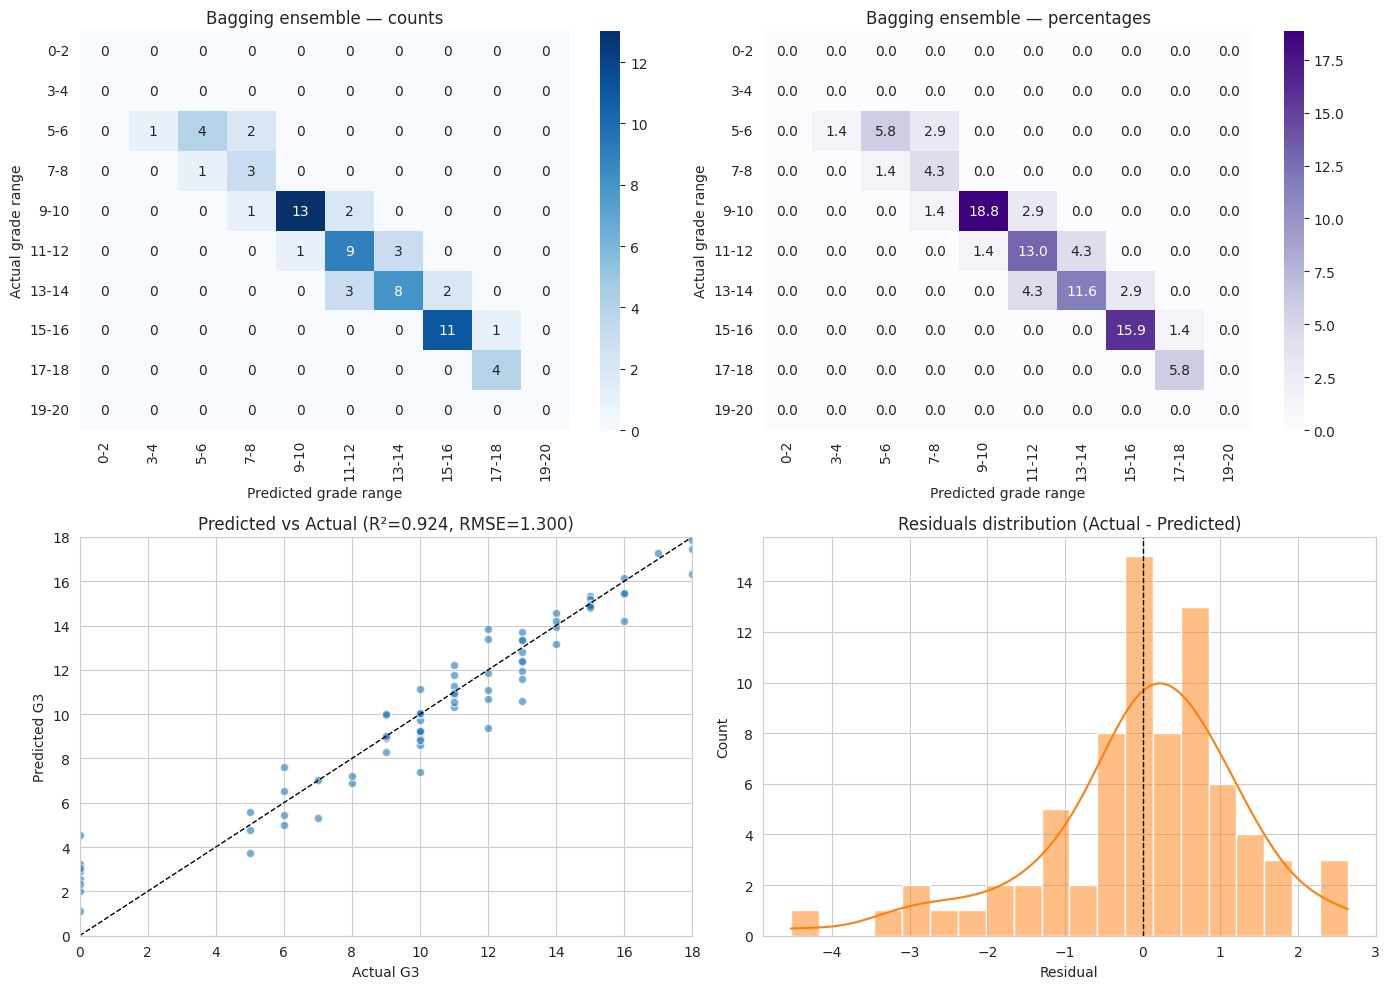

In [45]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

# ----------------------------
# 1) Load saved data
# ----------------------------
y_true = joblib.load('y_test_values.pkl')
y_pred = joblib.load('bagging_test_predictions.pkl')

# Ensure 1D arrays
y_true = np.asarray(y_true).ravel()
y_pred = np.asarray(y_pred).ravel()

# ----------------------------
# 2) Metrics
# ----------------------------
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# ----------------------------
# 3) Confusion-style setup (binning)
# ----------------------------
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ['0-2', '3-4', '5-6', '7-8', '9-10',
          '11-12', '13-14', '15-16', '17-18', '19-20']

y_true_binned = pd.cut(y_true, bins=bins, labels=labels, right=True)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels, right=True)
valid_idx = y_true_binned.notna() & y_pred_binned.notna()
cm = confusion_matrix(y_true_binned[valid_idx], y_pred_binned[valid_idx], labels=labels)

# Normalized (overall percentage)
norm_cm = cm.astype(float)
total = norm_cm.sum()
if total > 0:
    norm_cm = norm_cm / total
else:
    norm_cm[:] = 0.0

# ----------------------------
# 4) Plot: 2x2 dashboard
# ----------------------------
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 4a) Confusion-style heatmap (counts)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0, 0])
axes[0, 0].set_title('Bagging ensemble — counts')
axes[0, 0].set_xlabel('Predicted grade range')
axes[0, 0].set_ylabel('Actual grade range')

# 4b) Confusion-style heatmap (percentages)
sns.heatmap(norm_cm * 100, annot=True, fmt='.1f', cmap='Purples',
            xticklabels=labels, yticklabels=labels, ax=axes[0, 1])
axes[0, 1].set_title('Bagging ensemble — percentages')
axes[0, 1].set_xlabel('Predicted grade range')
axes[0, 1].set_ylabel('Actual grade range')

# 4c) Scatter: predictions vs. truth
axes[1, 0].scatter(y_true, y_pred, alpha=0.6, color='#1f77b4', edgecolor='white')
min_v = min(y_true.min(), y_pred.min())
max_v = max(y_true.max(), y_pred.max())
axes[1, 0].plot([min_v, max_v], [min_v, max_v], 'k--', linewidth=1)
axes[1, 0].set_title(f'Predicted vs Actual (R²={r2:.3f}, RMSE={rmse:.3f})')
axes[1, 0].set_xlabel('Actual G3')
axes[1, 0].set_ylabel('Predicted G3')
axes[1, 0].set_xlim(min_v, max_v)
axes[1, 0].set_ylim(min_v, max_v)

# 4d) Residuals distribution
residuals = y_true - y_pred
sns.histplot(residuals, bins=20, kde=True, color='#ff7f0e', ax=axes[1, 1])
axes[1, 1].axvline(0, color='k', linestyle='--', linewidth=1)
axes[1, 1].set_title('Residuals distribution (Actual - Predicted)')
axes[1, 1].set_xlabel('Residual')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Example: if your model was trained on 5 features in this order:
# ['G1', 'G2', 'studytime', 'failures', 'absences']

new_student = np.array([['GP', 'F' 18 'U', 'GT3', 'A', 4, 4, 'at_home', 'teacher' ;course;yes;no;mother;2;2;0;yes;no;no;no;yes;no;4;3;4;1;1;3;6;5;6;6;0;11;11]])  # shape (1, 5)

predicted_value = bagging_model.predict(new_student)
print("Predicted G3:", predicted_value[0])